### Final Project: Digit Recognizer Competition
#### Team Members: Paula Palles, Aaron Amankwaah, Nikhil Pandey

Our goal is to go out of the scope of the class using the MNIST dataset. This is a simple digit dataset that we want to use to try many different classification models to benchmark them. Our goal is to use Neural Networks, SVMs, and K-Nearest Neighbor with different parameters to see how the parameters affect the final result.

For **K-Nearest Neighbors**, we will focus on the K-Neighbors parameter.

For **Support Vector Machines** we will focus on different Gammas, C, and function parameters. 

For **Neural Networks**, we will focus on using sequential and convulation neural networks to compare them. We will also train our model with different amounts of hidden layers. For the scope of this project, we will use base-8 outputs (will be more aparent during the code). We will also look at runtime differences between GPU and CPU training. Finally, we will test how batch size and epoches affect the final result.

Our goal at the end of all the models is to be able to generate a through report of the models by comparing them and also integrating our models with a live canvas where users can input their own hand drawn numbers and immediately see the result from our models.

Dataset was obtained through Kaggle: https://www.kaggle.com/competitions/digit-recognizer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

### Cleaning and Exploratory Data Analysis

Our goal is to get the data and verify its contents. Specifically we are looking to check for data types and nulls. We are also looking to visualize different aspects of the data with the goal of better understanding it. After that is done, we want to take the appropirate actions to clean and format the dataset to prepare it for our models.

In [2]:
data = pd.read_csv('./data/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Gets types of first 5 columns
print("Data Types Head:", str(list(data.dtypes)[0:5]))

Data Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [4]:
# Verifies all columns are integers
flag = True
for col in data.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Columns are Integers: " + str(flag))

All Columns are Integers: True


In [5]:
# Makes sure there are no nulls
print("Total Nulls:", data.isna().sum().sum())

Total Nulls: 0


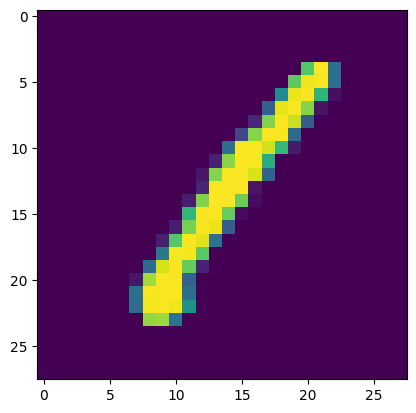

In [6]:
# Displays the first digit from the data
plt.imshow(data.iloc[0,1:].values.reshape(28,28))

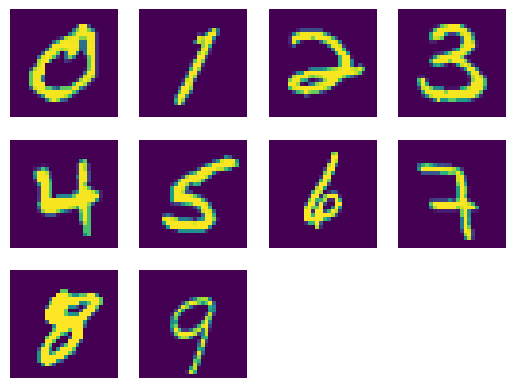

In [7]:
for i in range(10):
    digit_data = data[data.label == i]
    digit_data = digit_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
    plt.subplot(3, 4, i + 1)
    plt.imshow(digit_data.values.reshape(28, 28))
    plt.axis('off')

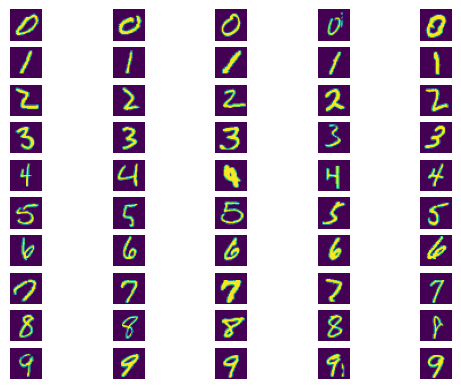

In [8]:
for i in range(10):
    digit_all_data = data[data.label == i]
    for j in range(5):
        digit_data = digit_all_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(digit_data.values.reshape(28, 28))
        plt.axis("off")

Text(0.5, 1.0, 'Digit Count')

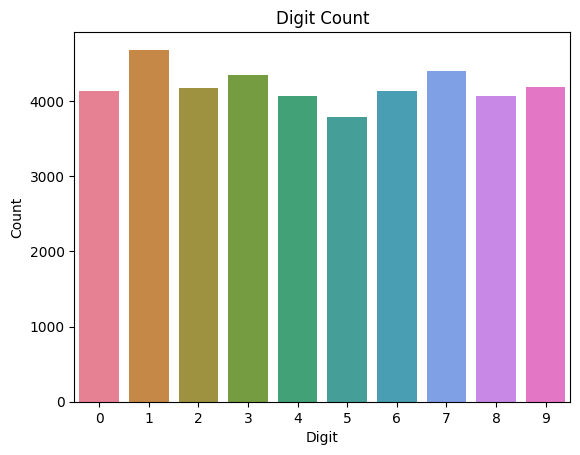

In [9]:
plot = sns.barplot(x=list(data.label.value_counts().index), y=list(data.label.value_counts().values), palette='husl')
plot.set(xlabel='Digit', ylabel='Count')
plot.set_title('Digit Count')

### Splitting Data

The data needs to be split and we will be using a 70:30 ratio for this. The goal is to verify that the data is balanced.

In [10]:
from sklearn.model_selection import train_test_split

# Random seed for reproducibility
rand_seed = 123
np.random.seed(rand_seed)

# Splits the data into training and validation sets
train, test = train_test_split(data, test_size=0.3, random_state=rand_seed)

In [11]:
# Resets the index of the data
train = train.reset_index(drop=True)

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29396,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29397,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29398,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Resets the index of the data
test = test.reset_index(drop=True)

test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12596,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12597,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12598,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Digit Count')

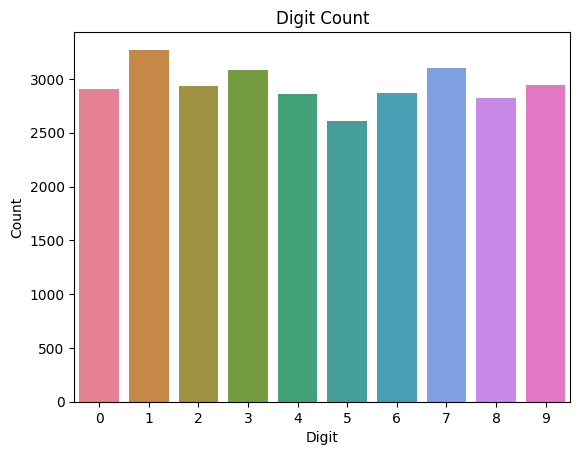

In [13]:
# Verifies that the training set is balanced
plot = sns.barplot(x=list(train.label.value_counts().index), y=list(train.label.value_counts().values), palette='husl')
plot.set(xlabel='Digit', ylabel='Count')
plot.set_title('Digit Count')

### Preprocessing Data

The data needs to be preprocessed and loaded as a tensor for deep learning. A tensor is a algebraic object that describe relationships. They can map between objects like vectors, scalars, and other tensors. For our case we are mapping vectors of data into scalars. We will use the Dataset class which stores our values into tensors preparing it for batch training.

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

c:\Users\pande\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# This class represents the dataset
class DigitDataset(Dataset):
    def __init__(self, data):
        # Data is converted to a numpy array which is used to create the tensor
        self.x = torch.from_numpy(data.iloc[:, 1:].to_numpy().astype(np.float32))
        self.y = torch.from_numpy(data.iloc[:, 0].to_numpy())
        
        # The number of rows in the data
        self.n_samples = data.shape[0]
    
    # For indexing the dataset
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # For getting the length of the dataset
    def __len__(self):
        return self.n_samples

In [16]:
trainset = DigitDataset(train)

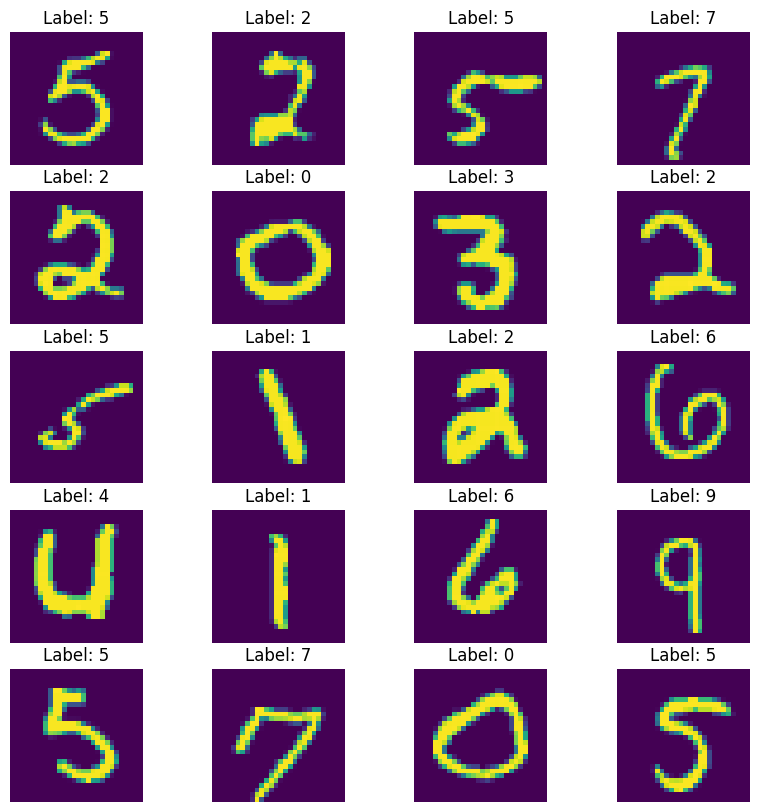

In [17]:
plt.figure(figsize=(10, 10))
for i in range(20):
    x, y = trainset[rand.randint(0, trainset.n_samples)]
    plt.subplot(5, 4, i + 1)
    plt.title("Label: " + str(y.item()))
    plt.imshow(x.reshape(28, 28))
    plt.axis("off")

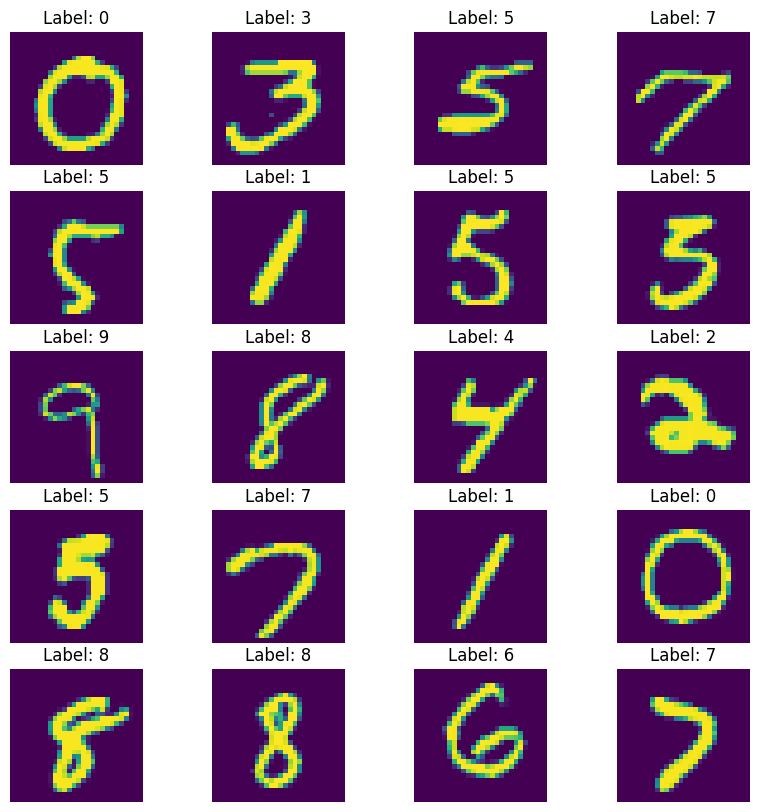

In [18]:
testset = DigitDataset(test)

plt.figure(figsize=(10, 10))
for i in range(20):
    x, y = testset[rand.randint(0, testset.n_samples)]
    plt.subplot(5, 4, i + 1)
    plt.title("Label: " + str(y.item()))
    plt.imshow(x.reshape(28, 28))
    plt.axis("off")

In [19]:
# This loads the data into batches
batch_num = 10
loaded_train = DataLoader(dataset=trainset, batch_size=batch_num, shuffle=True)

### Creating the Neural Network

We need to define the model before we can use it. We will create a basic sequential network network which has an input layer taking in a flatten 28 * 28 pixel data from the images and then passing it to two hidden layers with 64 inputs and outputs before eaching the output layer with an output of 10 with each representing a different digit. We will also use a rectified linear activation function because it is most popularly used. Finally we will use a log_softmax which will log the probability and then take the highest probability as the result.

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
# Defines the neural network model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Creates the input layer
        self.fc1 = nn.Linear(28 * 28, 64)
        
        # Our hidden layers
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        
        # Our output layer
        self.fc4 = nn.Linear(64, 10)
    
    # This passes data forward through the network
    def forward(self, x):
        # Data is passed through each layer using the relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # The last one doesn't use the relu function because it is the output layer
        x = self.fc4(x)
        
        # Logs the probability of each digit and returns the result with the highest probability
        return F.log_softmax(x, dim=1)

# Creates a new instance of the network
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
# Randomly created tensor with the same dim as real data for testing
x = torch.rand((28, 28))
x = x.view(-1, 28 * 28)
x.shape

torch.Size([1, 784])

In [23]:
# Tests if data is passed through the network properly
print(net(x))

tensor([[-2.3547, -2.2235, -2.3058, -2.3221, -2.3250, -2.3646, -2.2662, -2.2804,
         -2.3375, -2.2555]], grad_fn=<LogSoftmaxBackward0>)


### Train the Dataset

We will use an optimizer to calculate the gradients to update the neural network.

In [24]:
import torch.optim as optim

# The adam optimizer is one type of algorithm used to train and update the weights
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Number of iterations over the entire dataset
EPOCHS = 3

global loss_tracker
loss_tracker = []

# This is the training loop
for epoch in range(EPOCHS):
    # Loads the data in batches
    for data in loaded_train:
        # Seperates the data into features vs targets
        x, y = data
        
        # Resets the gradients for the next iteration
        net.zero_grad()
        
        # Runs the data through the network
        output = net(x.view(-1, 28 * 28))
        
        # Calculates the loss using the output
        loss = F.nll_loss(output, y)
        
        # Computes the gradients based on the loss
        loss.backward()
        
        # Actually updates the weights
        optimizer.step()    
    print("Current Loss", loss)
    loss_tracker.append(loss.item())

Current Loss tensor(0.4952, grad_fn=<NllLossBackward0>)
Current Loss tensor(0.1191, grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0096, grad_fn=<NllLossBackward0>)


<AxesSubplot: >

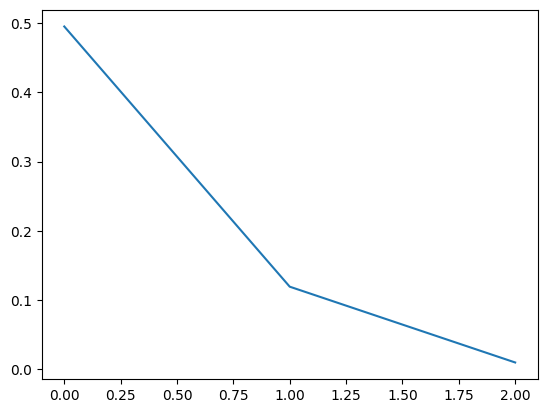

In [25]:
# Displays loss over time
sns.lineplot(x=range(EPOCHS), y=loss_tracker)

In [26]:
def get_acc(network, dataset):
    correct = 0
    total = 0
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                total += 1
    # Returns accuracy
    return correct/total

In [27]:
def get_failed(network, dataset):
    correct = 0
    total = 0
    failed = []
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                else:
                    failed.append((x, y, torch.argmax(i)))
                total += 1
    # Returns accuracy
    return correct/total, failed

In [28]:
train_acc, train_failed = get_failed(net, trainset)
print("Train Set Accuracy:", train_acc)

Train Set Accuracy: 0.9601360544217687


In [29]:
test_acc, test_failed = get_failed(net, testset)
print("Test Set Accuracy:", test_acc)

Test Set Accuracy: 0.9528571428571428


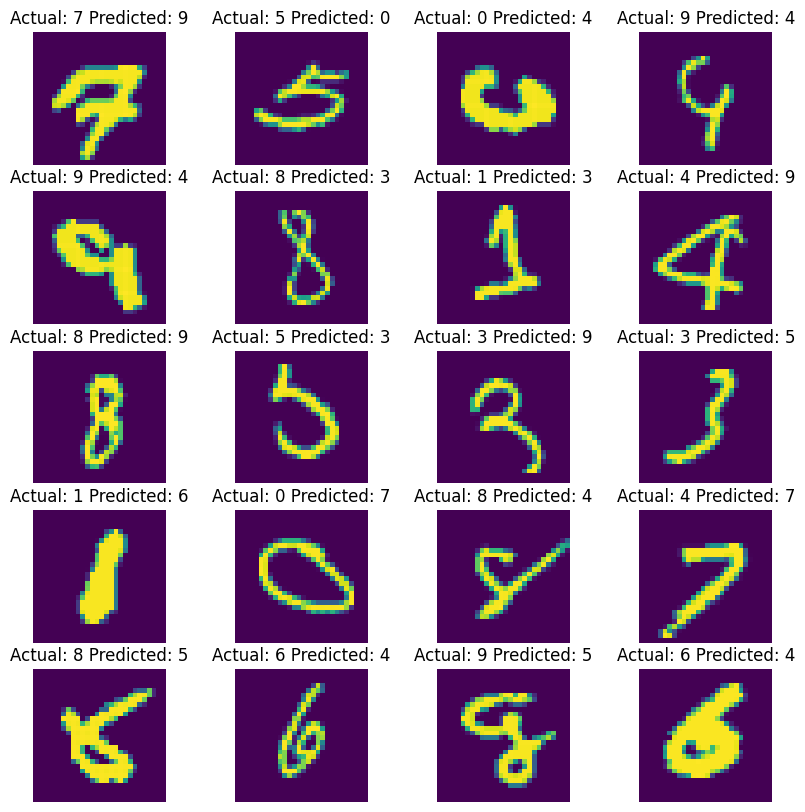

In [30]:
plt.figure(figsize=(10, 10))
for i in range(20):
    failed_random = rand.randint(0, len(train_failed))
    failed_random = train_failed[failed_random]
    
    plt.subplot(5, 4, i + 1)
    plt.imshow(failed_random[0].reshape(28, 28))
    plt.title("Actual: " + str(failed_random[1].item()) + " Predicted: " + str(failed_random[2].item()))
    plt.axis("off")

In [31]:
def failed_freq(fails):
    actual_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    pred_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for fail in fails:
        actual_freq[fail[1].item()] += 1
        pred_freq[fail[2].item()] += 1
    return actual_freq, pred_freq

Text(0.5, 1.0, 'Actual Failed Frequency')

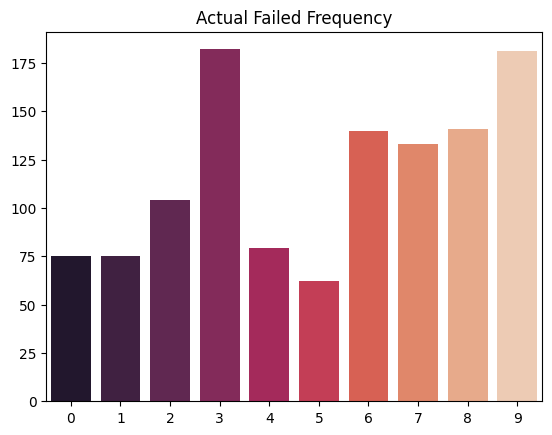

In [32]:
actual_freq, pred_freq = failed_freq(train_failed)
sns.barplot(x=list(range(10)), y=actual_freq, palette="rocket")
plt.title("Actual Failed Frequency")

Text(0.5, 1.0, 'Predict Failed Frequency')

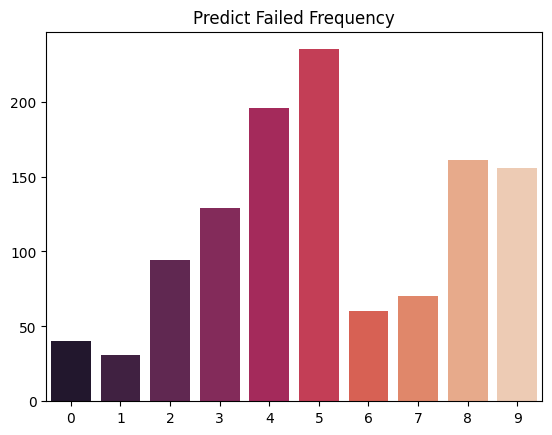

In [33]:
sns.barplot(x=list(range(10)), y=pred_freq, palette="rocket")
plt.title("Predict Failed Frequency")

### Transferring to GPU

More iterations can lead to better results but it will also take longer. To avoid this issue, it is better to migrate to a GPU which should boost our performance and shorten the training time for each iteration.

In [34]:
# Verifies that the GPU is available
gpu_available = torch.cuda.is_available()
print("GPU Available:", gpu_available)

GPU Available: True


In [35]:
# Obtains the GPU device
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [36]:
# Moves the network to the GPU
net = Net().to(device)

# Loads the data onto the GPU
batch_size = 64
loaded_train = DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [41]:
# Defines the training in a method
def training_loop(net, epochs, loaded_data):
    # The adam optimizer is one type of algorithm used to train and update the weights
    learning_rate = 0.001
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    # Number of iterations over the entire dataset
    EPOCHS = epochs
    global loss_tracker
    loss_tracker = []

    # This is the training loop
    for epoch in range(EPOCHS):
        # Loads the data in batches
        for data in loaded_data:
            # Seperates the data into features vs targets
            x, y = data
            x, y = x.to(device), y.to(device)
            
            # Resets the gradients for the next iteration
            net.zero_grad()
            
            # Runs the data through the network
            output = net(x.view(-1, 28 * 28))
            
            # Calculates the loss using the output
            loss = F.nll_loss(output, y)
            
            # Computes the gradients based on the loss
            loss.backward()
            
            # Actually updates the weights
            optimizer.step()    
        print("Current Loss", loss)
        loss_tracker.append(loss.item())

In [42]:
# Trains our old model on the GPU
training_loop(net, 10, loaded_train)

Current Loss tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0366, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0508, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0798, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.1020, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)


In [43]:
loss_tracker

[0.0175488144159317,
 0.013888447545468807,
 0.0142734469845891,
 0.03661063686013222,
 0.05080388858914375,
 0.0008196763810701668,
 0.07975771278142929,
 0.10200214385986328,
 0.020745866000652313,
 0.0003032284148503095]

<AxesSubplot: >

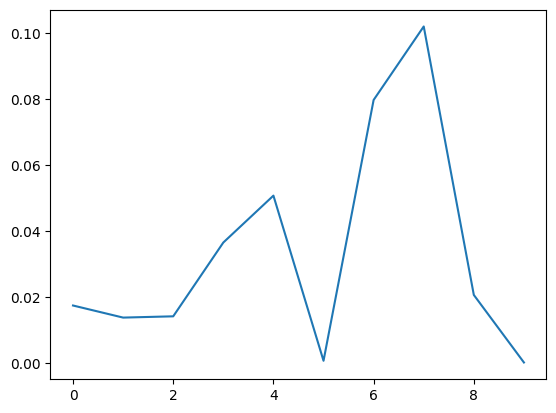

In [44]:
# Displays loss over time
sns.lineplot(x=range(10), y=loss_tracker)

In [45]:
# Get the accuracy on the GPU
def get_gpu_failed(network, dataset):
    correct = 0
    total = 0
    failed = []
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            x, y = x.to(device), y.to(device)
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                else:
                    failed.append((x, y, torch.argmax(i)))
                total += 1
    # Returns accuracy
    return correct/total, failed

In [46]:
# Gets the accuracy and failed predictions on the GPU
acc, failed = get_gpu_failed(net, trainset)
print("Training Accuracy:", acc)

Training Accuracy: 0.9897278911564625


In [47]:
# Gets the accuracy and failed predictions on the GPU
acc, failed = get_gpu_failed(net, testset)
print("Testing Accuracy:", acc)

Testing Accuracy: 0.9642857142857143


In [48]:
# Visualizes the failed predictions
def viz_failed(failed):
    plt.figure(figsize=(10, 10))
    for i in range(20):
        failed_random = rand.randint(0, len(failed))
        failed_random = failed[failed_random]
        
        plt.subplot(5, 4, i + 1)
        plt.imshow(failed_random[0].cpu().reshape(28, 28))
        plt.title("Actual: " + str(failed_random[1].item()) + " Predicted: " + str(failed_random[2].item()))
        plt.axis("off")
    plt.show()

# Visualizes the frequency of the failed predictions
def viz_freq_failed(failed):
    freq = failed_freq(failed)
    sns.barplot(x=list(range(10)), y=freq[0], palette="rocket")
    plt.title("Actual Failed Frequency")
    plt.show()

    sns.barplot(x=list(range(10)), y=freq[1], palette="rocket")
    plt.title("Predicted Failed Frequency")
    plt.show()

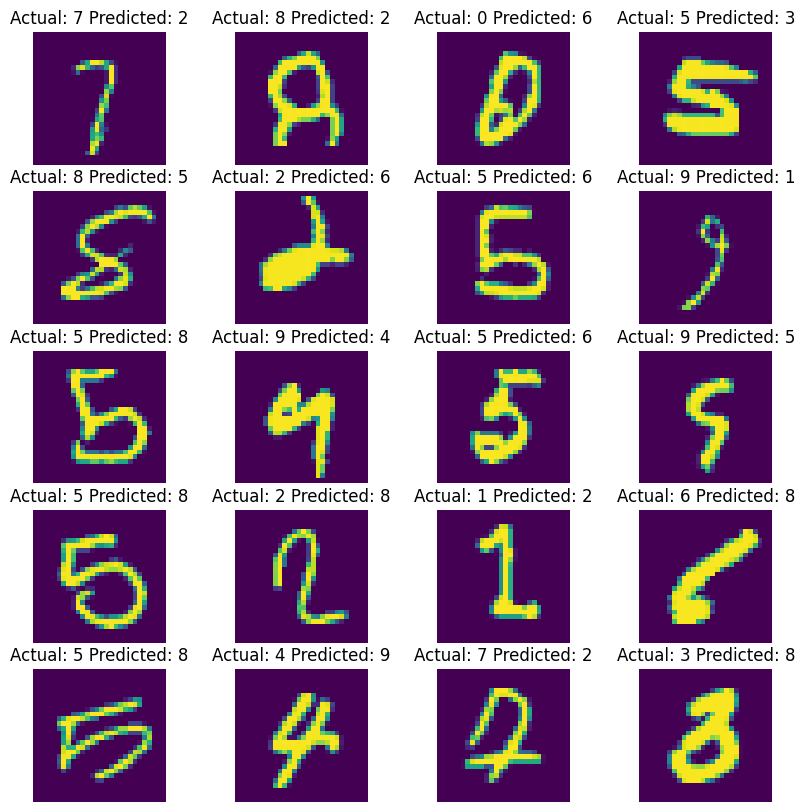

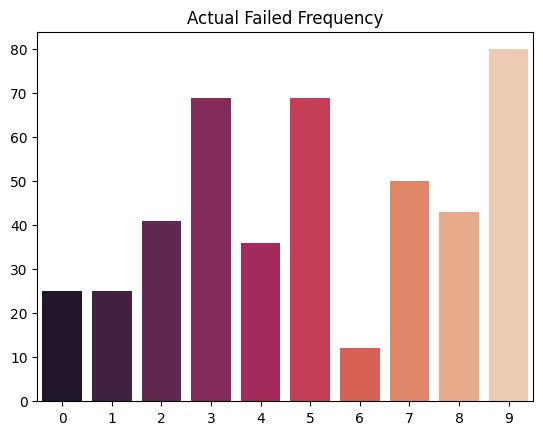

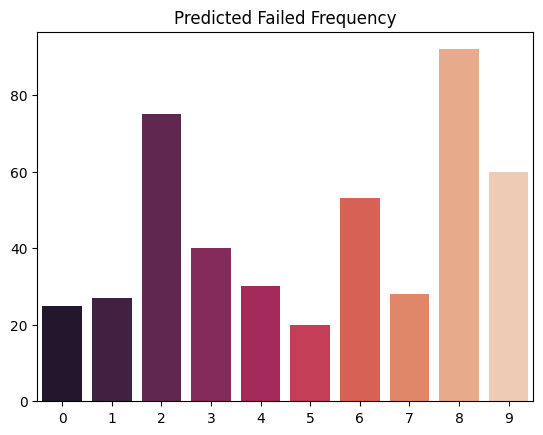

In [49]:
# Visualizes the failed predictions
viz_failed(failed)
viz_freq_failed(failed)

In [50]:
# Testing one more batch size and epoch
net = Net().to(device)
loaded_train = DataLoader(trainset, batch_size=32, shuffle=True)
training_loop(net, 20, loaded_train)

Current Loss tensor(0.1175, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.1554, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0779, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.4025, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.2786, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0251, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.3466, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.1686, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.2366, device='cuda:0', grad_fn=<NllLossBackward0>)
Current Loss tensor(0.0560, device='cuda:0', grad_f

<AxesSubplot: >

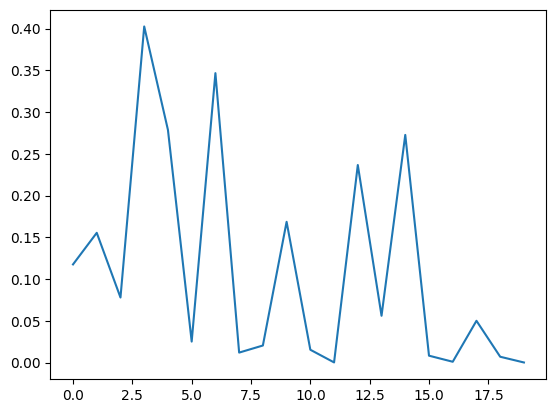

In [51]:
# Displays loss over time
sns.lineplot(x=range(20), y=loss_tracker)

In [52]:
# Gets the accuracy and failed predictions on the GPU
acc, failed = get_gpu_failed(net, trainset)
print("Training Accuracy:", acc)

acc, failed = get_gpu_failed(net, testset)
print("Testing Accuracy:", acc)

Training Accuracy: 0.9909183673469387
Testing Accuracy: 0.9638888888888889


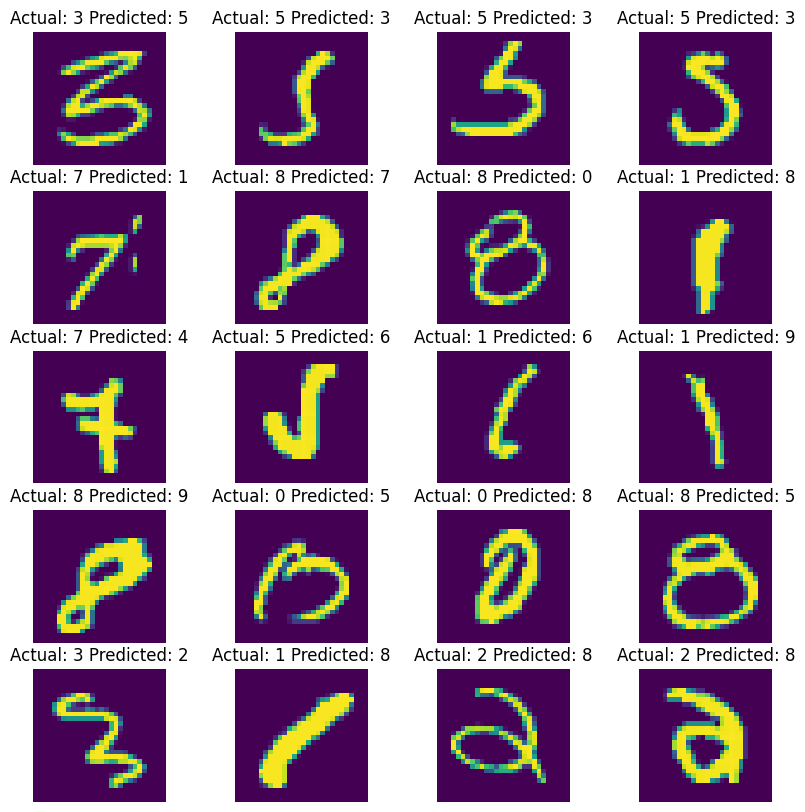

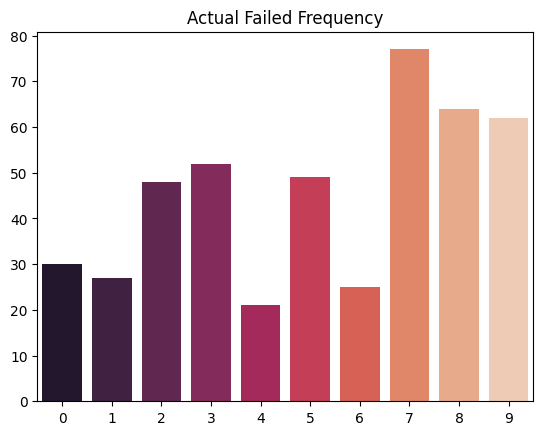

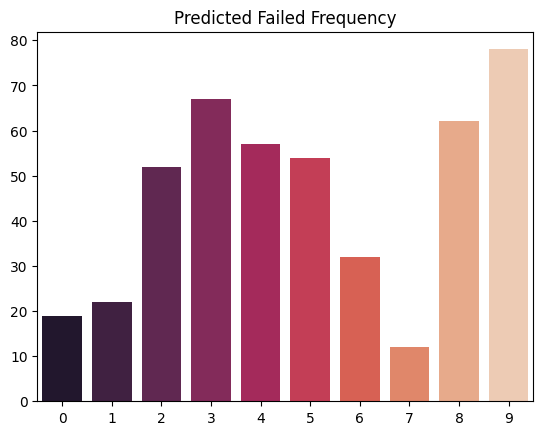

In [53]:
# Visualizes the failed predictions
viz_failed(failed)
viz_freq_failed(failed)

In [54]:
# Get the accuracy on the GPU
def get_gpu_success(network, dataset):
    correct = 0
    total = 0
    correct_guess = []
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            x, y = x.to(device), y.to(device)
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                    correct_guess.append((x, y, torch.argmax(i)))
                total += 1
    # Returns accuracy
    return correct/total, correct_guess

In [55]:
# Gets correct guesses on the GPU
acc, correct_guess = get_gpu_success(net, testset)

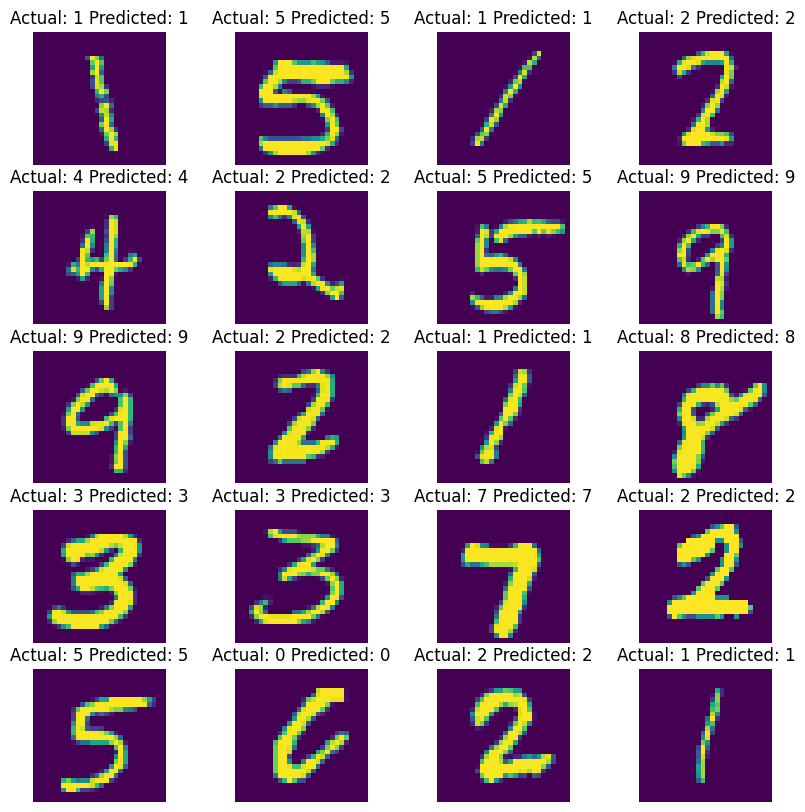

In [56]:
# Visualizes the correct guesses
viz_failed(correct_guess)

### Notes Beforing Moving On
So far we have worked with the most basic neural networks and have done three different training iterations of it. The first one was on a cpu but then we shifted to a gpu to run larger cycles faster. The parameters that were adjusted were epoches and epoches primarily in this case.

- Epoches deals with how many times you want to cycle through the dataset.
- Batches deals with how much data passes through the network in each iteration. Theory states larger batches means better results but it doesn't seem to be the case. The other caveat to batches is that the bigger the batch, the more memory you require.

The combination of batches and epoches affect the training time. Bigger batches and smaller epoches will speed up the training time but of course more epoches can lead to better results.

To get the best neural network, you really need to find the balance between these two parameters and kind of get lucky too because neural networks are black boxes.

There is one major thing we could have also changed and that is our model itself by changing the inputs and outputs between each layer and in particular adding more hidden layers. The reason we did not do this is because we are going to do convulational neural networks next which are a different type of network with different types of hidden layers which are better for image processing.

We could also change our activation function but ReLu is pretty good and widely used in the industry.

### Convulational Networks

The next goal is to build out a convulational network which is a much better neural network for images because it can take inputs with multiple dimensions. By reserving the dimension of the image over flattening it, we can show the network features that are more accurate to the image than before.

In [57]:
# This class represents the dataset
class DigitConvDataset(Dataset):
    def __init__(self, data):
        # Data is converted to a numpy array which is used to create the tensor
        self.x = torch.from_numpy(data.iloc[:, 1:].to_numpy().astype(np.float32))
        
        # Makes the targets into one-hot vectors
        new_y = [np.eye(10)[i] for i in data.iloc[:, 0]]
        self.y = torch.from_numpy(np.array(new_y).astype(np.float32))
        
        # The number of rows in the data
        self.n_samples = data.shape[0]
    
    # For indexing the dataset
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # For getting the length of the dataset
    def __len__(self):
        return self.n_samples

In [58]:
traincovset = DigitConvDataset(train)
testconvset = DigitConvDataset(test)

In [59]:
# We need to define a new network
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        # We take the whole image as input and output 16 features. We use a 3x3 kernel
        self.conv1 = nn.Conv2d(1, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        
        # Toy data to get the number of inputs to the first linear layer
        x = torch.randn(28, 28).view(-1, 1, 28, 28)
        self.linear_inputs = self.get_linear(self.convs(x))
        
        # The linear layers
        self.fc1 = nn.Linear(self.get_linear(self.convs(x)), 512)
        self.fc2 = nn.Linear(512, 10)
    
    # Use this function to get the number of inputs to pass to the first linear layer
    def get_linear(self, x):        
        return x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
    
    # Passes the image through the convolutional layers
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        return x
    
    # Gets number of inputs to the first linear layer
    def get_linear_inputs(self):
        return self.linear(self.convs())
    
    def forward(self, x):
        # Goes through the convolutional layers
        x = self.convs(x)
        
        # Converts the output of the convolutional layers to a 1D tensor
        x = x.view(-1, self.linear_inputs)
        
        # Goes through the linear layers
        x = F.relu(self.fc1(x))
        
        # Gets the output
        x = self.fc2(x)
        return F.softmax(x, dim=1)

In [70]:
# Defines the training for the convolutional network
def training_conv_loop(net, epochs, loaded_data):
    # The adam optimizer is one type of algorithm used to train and update the weights
    learning_rate = 0.001
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    loss_func = nn.MSELoss()

    # Number of iterations over the entire dataset
    EPOCHS = epochs
    global loss_tracker
    loss_tracker = []

    # This is the training loop
    for epoch in range(EPOCHS):
        # Loads the data in batches
        for data in loaded_data:
            # Seperates the data into features vs targets
            x, y = data
            x, y = x.to(device), y.to(device)
            
            # Resets the gradients for the next iteration
            net.zero_grad()
            
            # Runs the data through the network
            output = net(x.view(-1, 1, 28, 28))
            
            # Calculates the loss using the output
            loss = loss_func(output, y)
            
            # Computes the gradients based on the loss
            loss.backward()
            
            # Actually updates the weights
            optimizer.step()    
        print("Current Loss", loss)
        loss_tracker.append(loss.item())

In [71]:
net = ConvNet().to(device)
loaded_train = DataLoader(traincovset, batch_size=32, shuffle=True)
training_conv_loop(net, 20, loaded_train)

Current Loss tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0023, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(1.6363e-07, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(9.8665e-05, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0245, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(2.5137e-05, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0058, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0087, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(3.6630e-42, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0167, device=

<AxesSubplot: >

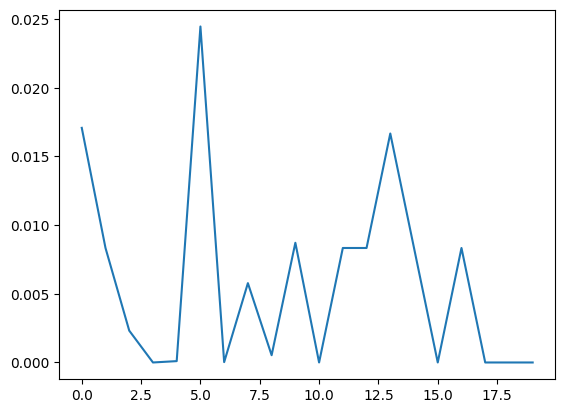

In [72]:
# Displays loss over time
sns.lineplot(x=range(20), y=loss_tracker)

In [73]:
# Get the accuracy on the GPU
def get_gpu_conv_failed(network, dataset):
    correct = 0
    total = 0
    failed = []
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            x, y = x.to(device), y.to(device)
            
            # Puts features through the network
            output = network(x.view(-1, 1, 28, 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                else:
                    failed.append((x, y, torch.argmax(i)))
                total += 1
    # Returns accuracy
    return correct/total, failed

In [74]:
acc, failed = get_gpu_conv_failed(net, trainset)
print("Training Accuracy:", acc)

Training Accuracy: 0.9293877551020409


In [75]:
acc, failed = get_gpu_conv_failed(net, testset)
print("Testing Accuracy:", acc)

Testing Accuracy: 0.9291269841269841


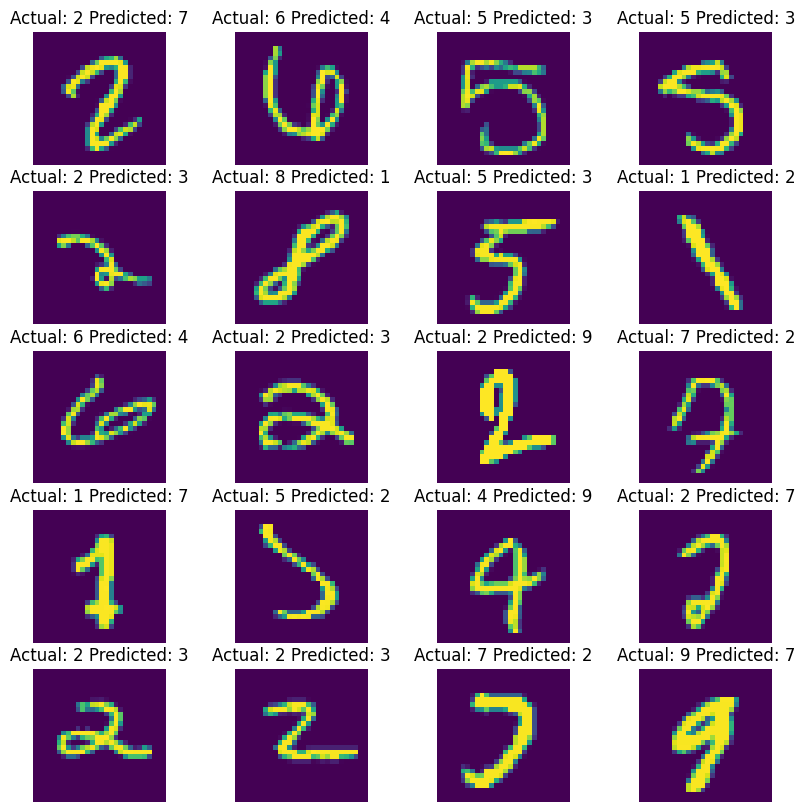

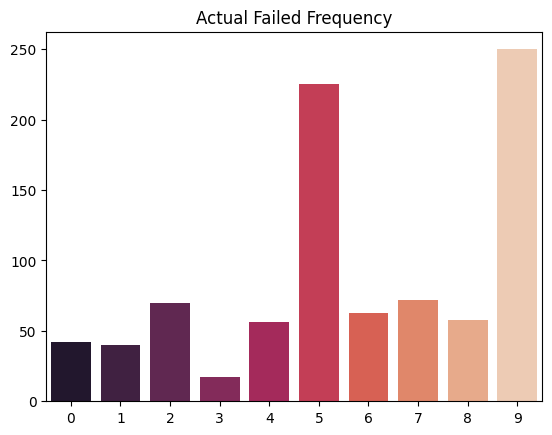

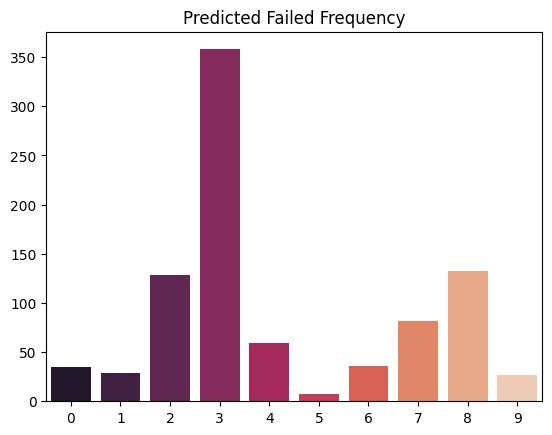

In [76]:
# Visualizes the failed guesses
viz_failed(failed)
viz_freq_failed(failed)

In [77]:
# Major training loop
net = ConvNet().to(device)
loaded_train = DataLoader(traincovset, batch_size=64, shuffle=True)
training_conv_loop(net, 100, loaded_train)

Current Loss tensor(0.0057, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0132, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(8.4992e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(3.3142e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(8.0461e-10, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(8.8101e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(4.1274e-11, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0050, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(2.1830e-05, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(7.4708e-09, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(2.2085e-06, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(3.4212e-12, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(2.9861e-14, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Los

<AxesSubplot: >

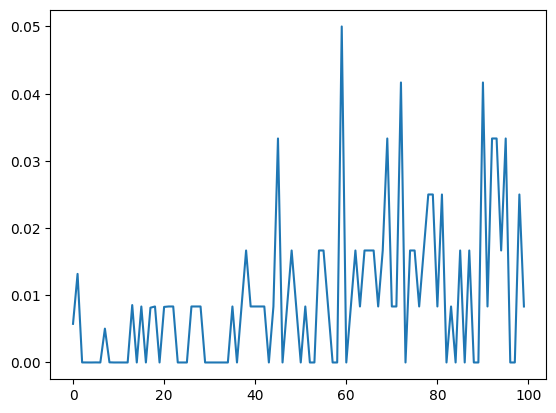

In [78]:
# Displays loss over time
sns.lineplot(x=range(100), y=loss_tracker)

In [79]:
acc, failed = get_gpu_conv_failed(net, trainset)
print("Training Accuracy:", acc)

Training Accuracy: 0.8937074829931972


In [80]:
acc, failed = get_gpu_conv_failed(net, testset)
print("Testing Accuracy:", acc)

Testing Accuracy: 0.8848412698412699


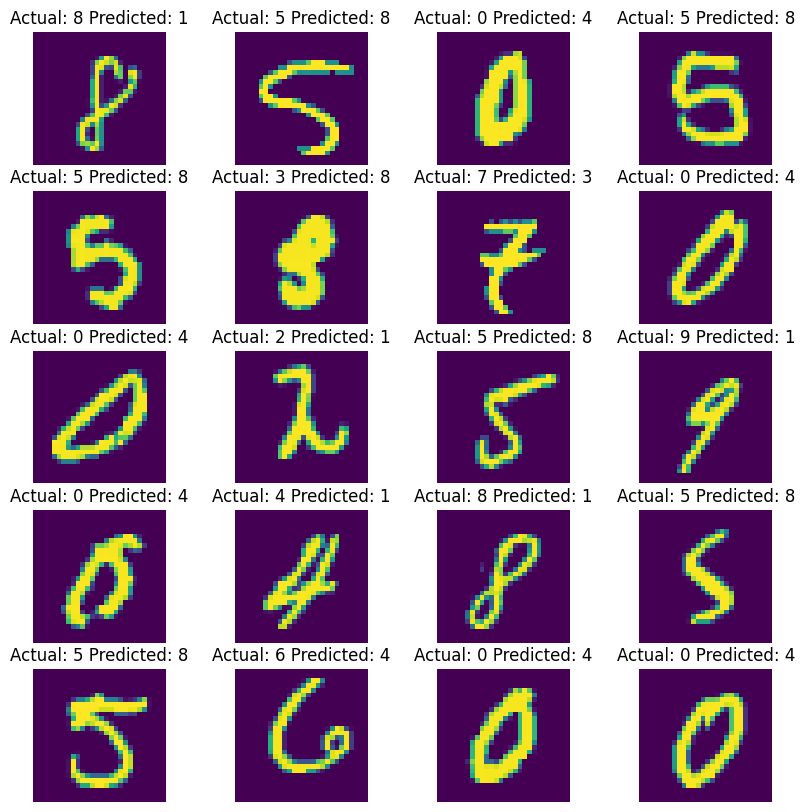

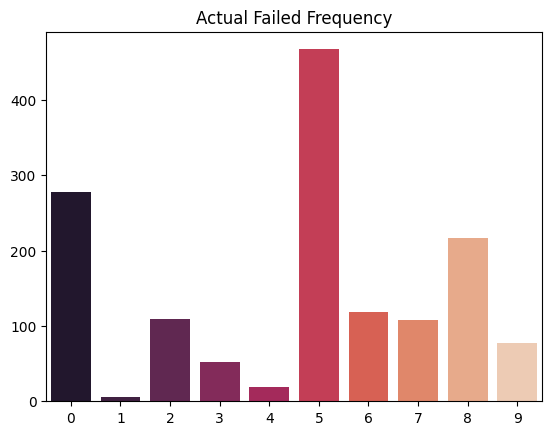

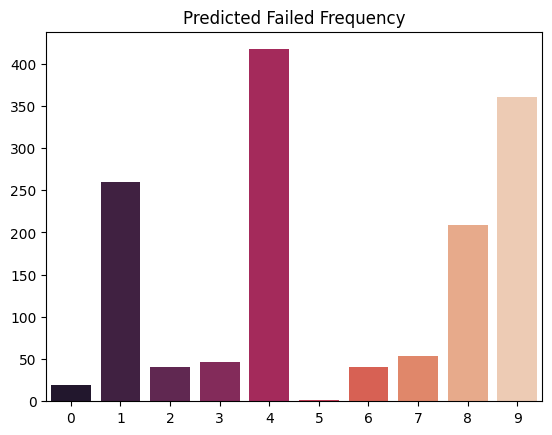

In [81]:
# Visualizes the failed guesses
viz_failed(failed)
viz_freq_failed(failed)

In [82]:
net = ConvNet().to(device)
loaded_train = DataLoader(traincovset, batch_size=64, shuffle=True)
training_conv_loop(net, 10, loaded_train)
acc, failed = get_gpu_conv_failed(net, trainset)
print("Training Accuracy:", acc)

Current Loss tensor(0.0188, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(1.3732e-05, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0186, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0083, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(2.6041e-07, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0142, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward0>)
Current Loss tensor(0.0118, device='cuda:0', grad_fn=<MseLossBackward0>)
Training Accuracy: 0.9754421768707483


<AxesSubplot: >

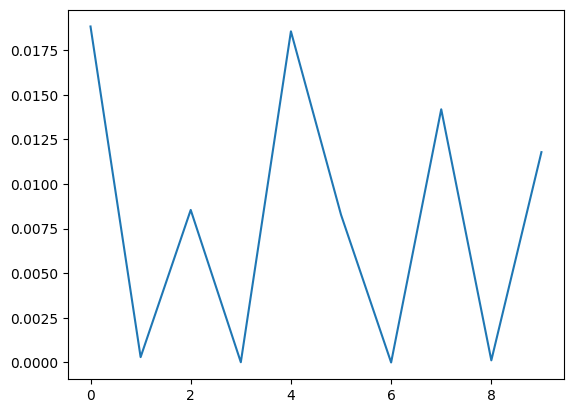

In [83]:
# Displays loss over time
sns.lineplot(x=range(10), y=loss_tracker)

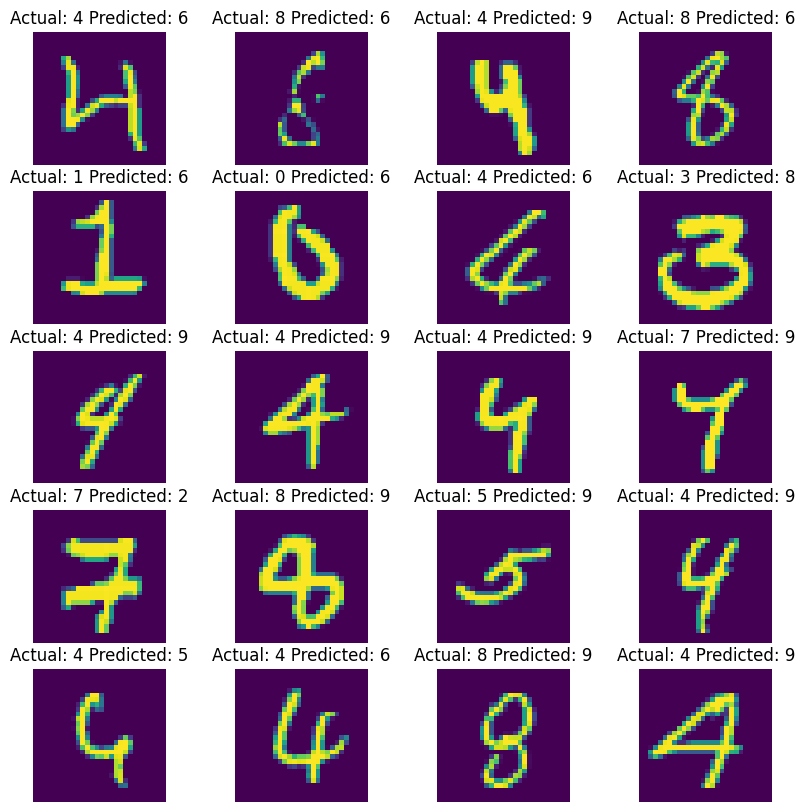

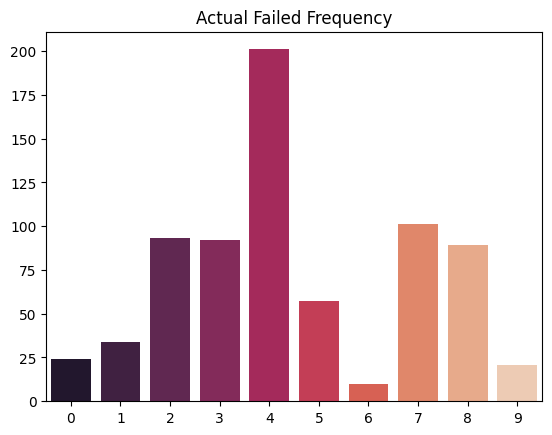

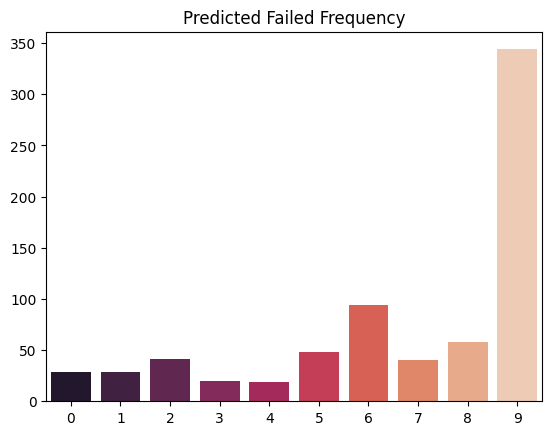

In [84]:
# Visualizes the failed guesses
viz_failed(failed)
viz_freq_failed(failed)